# Using Population objects to create biased data

In [1]:
import mlsim
import pandas as pd
import numpy as np
import seaborn as sns
from collections import namedtuple

Create an all default population

In [2]:
pop = mlsim.bias.Population()

To view the details on this population, we can use the `get_parameter_description` method.

In [3]:
print(pop.get_parameter_description())

Demographic Parameters
DemParams(Pa=[0.5, 0.5], Pz_a=[[0.5, 0.5], [0.5, 0.5]])
Target Parameters 
TargetParams(Py_az=[[[0.95, 0.05], [0.95, 0.05]], [[0.95, 0.05], [0.95, 0.05]]])
Feature Parameters 
FeatureParams(distfunc=<function <lambda> at 0x7f318fb17700>, theta=[[[[5, 2], [2, 5]], [[5, 2], [2, 5]]], [[[5, 2], [2, 5]], [[5, 2], [2, 5]]]])
Feature Noise Parameters 
NoiseParams(noisefunc=<function <lambda> at 0x7f318fb1a280>, theta=[[[1.0, 1.0], [1.0, 1.0]], [[1.0, 1.0], [1.0, 1.0]]])


The instantiation just assigns values to these parameters. In order to get data, we use the `sample` method.

In [4]:
help(pop.sample)

Help on method sample in module mlsim.bias.populations:

sample(N, return_as='DataFrame') method of mlsim.bias.populations.Population instance
    sample N members of the  population, according to its underlying
    distribution
    
    Parameters
    -----------
    N : int
        number of samples
    return_as : string, 'dataframe'
        type to return as, can be pandas 'DataFrame' or IBM AIF360
        'structuredDataset'



In [5]:
pop_df1 = pop.sample(100)
pop_df1.head()

,a,z,y,x0,x1
0,0.0,1.0,1.0,-0.818935,7.779253
1,1.0,1.0,1.0,0.971896,3.810695
2,0.0,1.0,1.0,2.061033,3.884892
3,0.0,0.0,0.0,3.869546,3.317389
4,1.0,1.0,1.0,2.650905,5.088740


## Changing the type of bias

Now demo some with various biases to create examples

In [6]:
# create a correlated demographic sampler
label_bias_dem = mlsim.bias.DemographicCorrelated(rho_a=.2,rho_z=[.25,.15])

# instantiate a population with that
pop_label_bias = mlsim.bias.PopulationInstantiated(demographic_sampler=label_bias_dem)

In [7]:
pop_label_bias_df1 = pop_label_bias.sample(100)
pop_label_bias_df1.head()

,a,z,y,x0,x1
0,0.0,0.0,0.0,5.094260,1.116788
1,0.0,0.0,0.0,6.291435,1.966124
2,0.0,0.0,0.0,3.497517,3.132095
3,1.0,0.0,0.0,5.800186,2.457439
4,0.0,0.0,0.0,6.020915,1.688231


New we'll create a feature bias where the classes are separable for one group and not for the other.

In [8]:
feature_sample_dist = lambda mu,cov :np.random.multivariate_normal(mu,cov)
per_group_means = [[[1,2,3,4,3,3],[4,6,8,8,10,6]],[[3,2,3,4,4,3],[1,3,4,4,5,3]]]
D =6
shared_cov = [np.eye(D)*.75,.95*np.eye(D)]
feature_bias = mlsim.bias.FeaturePerGroupSharedParamWithinGroup(
            feature_sample_dist,per_group_means,shared_cov)
pop_feature_bias = mlsim.bias.PopulationInstantiated(feature_sampler=feature_bias)

In [9]:
pop_feature_bias_df1 = pop_feature_bias.sample(100)
pop_feature_bias_df1.head()

,a,z,y,x0,x1,x2,x3,x4,x5
0,1.0,1.0,1.0,0.558509,2.656688,4.180281,6.091513,4.827220,2.647120
1,0.0,0.0,0.0,1.219891,2.257946,1.680967,5.353411,3.413125,2.788161
2,1.0,1.0,1.0,1.941352,3.555537,3.306645,4.951715,3.798673,6.469498
3,0.0,1.0,1.0,3.622279,1.153438,7.668309,4.320885,4.489896,2.239210
4,0.0,1.0,1.0,4.040583,2.351169,5.051904,5.609795,4.729816,3.237812


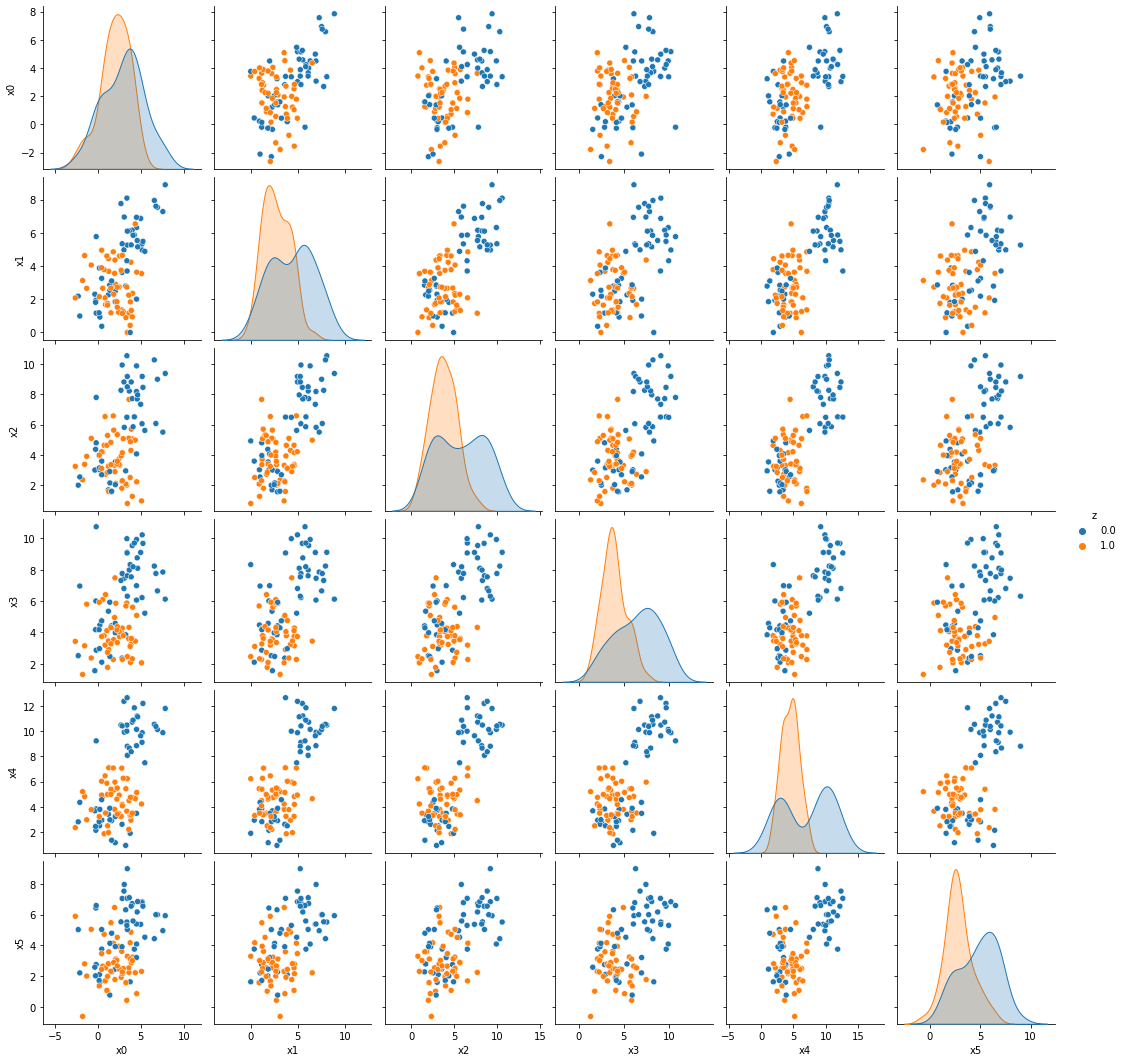

In [10]:
var_list = ['x'+ str(i) for i in range(D)]
g = sns.pairplot(pop_feature_bias_df1, vars= var_list, hue = 'z')

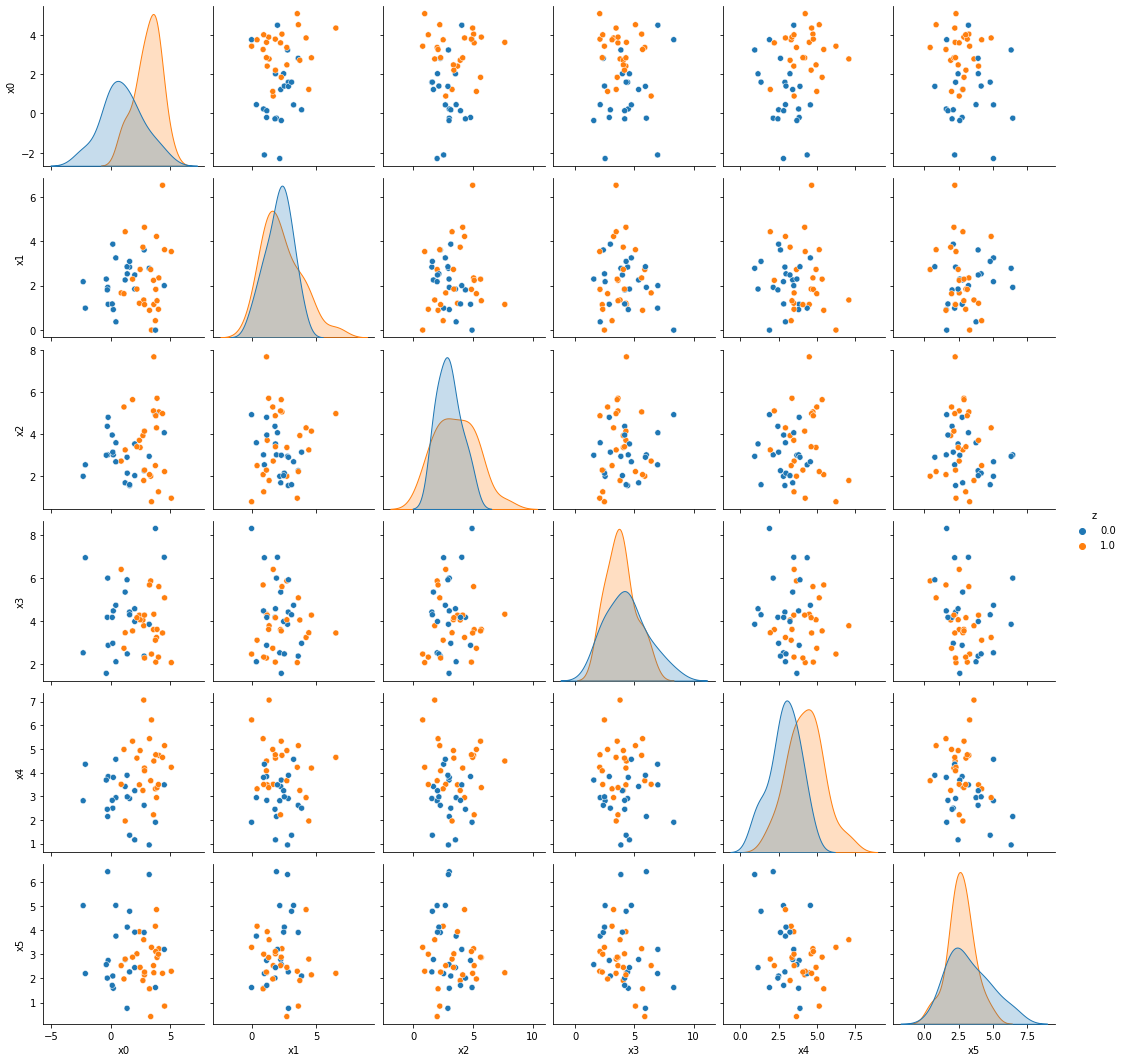

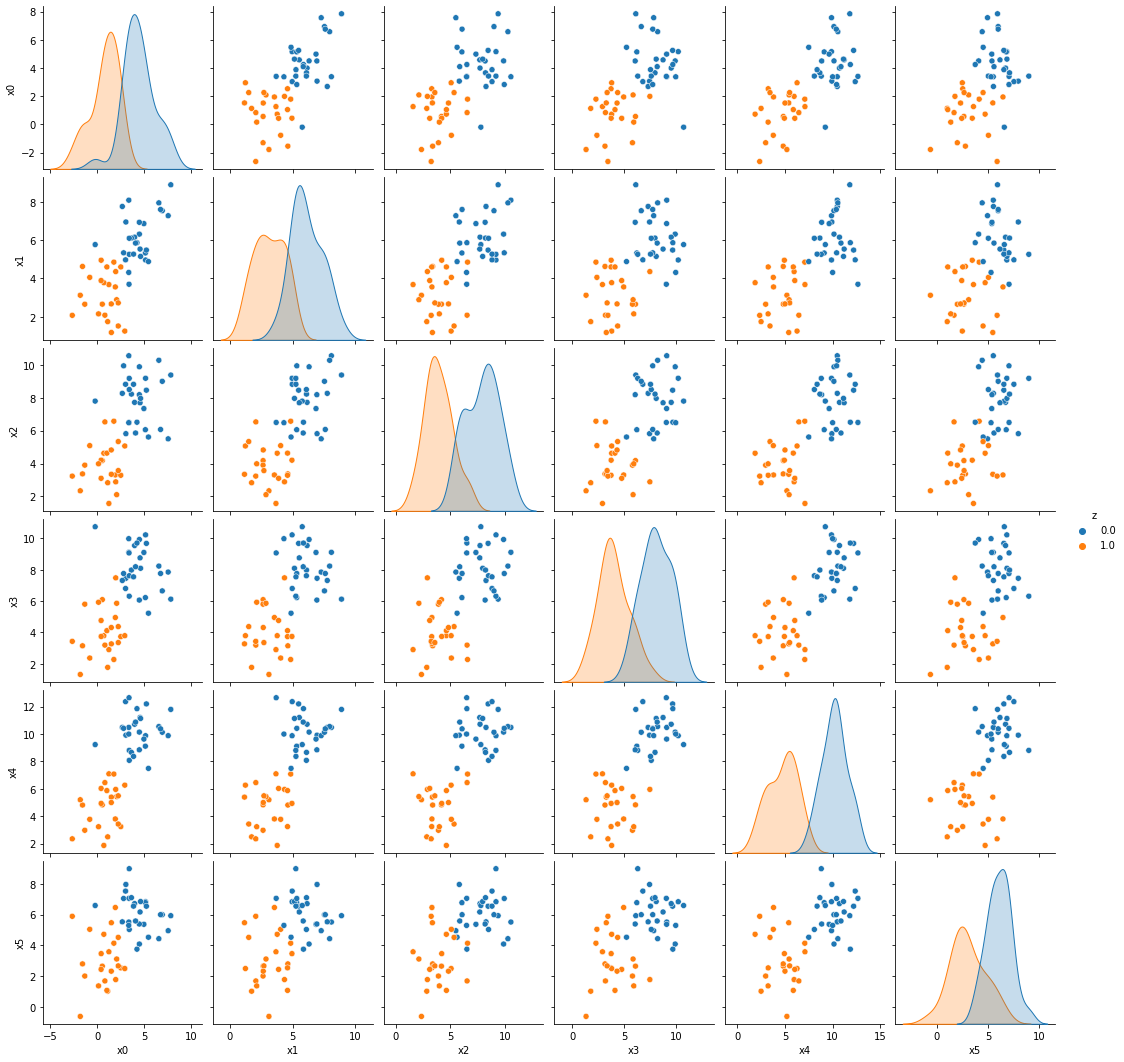

In [11]:
[sns.pairplot(dffbai, vars= var_list, hue = 'z') for ai,dffbai in pop_feature_bias_df1.groupby('a')]